## Imports

In [9]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [10]:
imdir = '/home/drevital/obstacles_classification_datasets/rgb_6/train/obstacle'
imname = '32_637_.81_2021-08-17--18-09-44_.jpg'
threshold = 60

# Read image & separate it to <ref, current>

In [11]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

## Generate diff & mask images

In [12]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)

# old morphological operations
copyImg = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)  # reduce noise
copyImg = cv2.dilate(copyImg, np.ones((7, 7), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)
copyImg = cv2.dilate(copyImg, np.ones((9, 9), np.uint8), iterations=1)
kernel = np.ones((11, 11), np.uint8)  # kernel for dilation

# increase area to an object
copyImg = cv2.dilate(copyImg, kernel, iterations=2)
copyImg = cv2.dilate(copyImg, np.ones((13, 13), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((11, 11), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)

mask = copyImg
 
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)        

## Concatenate <ref, current, mask> for training

In [13]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

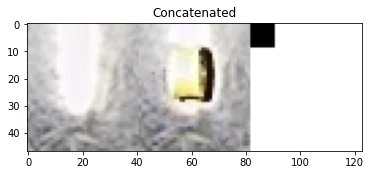

In [14]:
plt.imshow(concat)
plt.title('Concatenated')
plt.show()

In [15]:
concat.shape

(47, 123, 3)

In [16]:
concat[2][:100]

array([[184, 183, 188],
       [205, 204, 209],
       [207, 207, 209],
       [208, 208, 210],
       [209, 209, 211],
       [216, 216, 218],
       [222, 222, 222],
       [223, 223, 223],
       [222, 222, 222],
       [229, 229, 229],
       [236, 234, 235],
       [253, 251, 252],
       [254, 252, 253],
       [248, 246, 247],
       [247, 245, 246],
       [248, 246, 247],
       [249, 244, 248],
       [249, 244, 248],
       [248, 243, 247],
       [247, 242, 246],
       [247, 242, 246],
       [245, 240, 244],
       [247, 242, 246],
       [252, 247, 251],
       [253, 249, 250],
       [254, 250, 251],
       [242, 238, 237],
       [234, 230, 229],
       [227, 223, 220],
       [222, 218, 215],
       [211, 207, 204],
       [211, 207, 204],
       [221, 220, 216],
       [221, 220, 216],
       [214, 213, 209],
       [213, 212, 208],
       [210, 209, 207],
       [208, 207, 205],
       [199, 199, 199],
       [192, 192, 192],
       [186, 186, 188],
       [186, 186